In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Load the Dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/Automobile.csv')
df.head()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2


## Dataset Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

In [5]:
df.describe()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors,normalized-losses,symboling
count,201.000000,205.000000,205.000000,203.000000,203.000000,205.000000,201.000000,201.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,203.000000,164.000000,205.000000
mean,13207.129353,30.751220,25.219512,5125.369458,104.256158,10.142537,3.255423,3.329751,126.907317,4.380488,2555.565854,53.724878,65.907805,174.049268,98.756585,3.123153,122.000000,0.834146
std,7947.066342,6.886443,6.542142,479.334560,39.714369,3.972040,0.316717,0.273539,41.642693,1.080854,520.680204,2.443522,2.145204,12.337289,6.021776,0.994841,35.442168,1.245307
min,5118.000000,16.000000,13.000000,4150.000000,48.000000,7.000000,2.070000,2.540000,61.000000,2.000000,1488.000000,47.800000,60.300000,141.100000,86.600000,2.000000,65.000000,-2.000000
25%,7775.000000,25.000000,19.000000,4800.000000,70.000000,8.600000,3.110000,3.150000,97.000000,4.000000,2145.000000,52.000000,64.100000,166.300000,94.500000,2.000000,94.000000,0.000000
50%,10295.000000,30.000000,24.000000,5200.000000,95.000000,9.000000,3.290000,3.310000,120.000000,4.000000,2414.000000,54.100000,65.500000,173.200000,97.000000,4.000000,115.000000,1.000000
75%,16500.000000,34.000000,30.000000,5500.000000,116.000000,9.400000,3.410000,3.590000,141.000000,4.000000,2935.000000,55.500000,66.900000,183.100000,102.400000,4.000000,150.000000,2.000000
max,45400.000000,54.000000,49.000000,6600.000000,288.000000,23.000000,4.170000,3.940000,326.000000,12.000000,4066.000000,59.800000,72.300000,208.100000,120.900000,4.000000,256.000000,3.000000


In [6]:
df.describe(include = 'object')

,fuel-system,engine-type,engine-location,drive-wheels,body-style,aspiration,fuel-type,make
count,205,205,205,205,205,205,205,205
unique,8,7,2,3,5,2,2,22
top,mpfi,ohc,front,fwd,sedan,std,gas,toyota
freq,94,148,202,120,96,168,185,32


## Feature Engineering

### Grouping features into Numerical and Categorical Features

In [7]:
numerical = df.select_dtypes(include = ['int64', 'float64']).columns
categorical = df.select_dtypes(include = ['object']).columns

print(numerical)
print()
print(categorical)

Index(['price', 'highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower',
       'compression-ratio', 'stroke', 'bore', 'engine-size',
       'num-of-cylinders', 'curb-weight', 'height', 'width', 'length',
       'wheel-base', 'num-of-doors', 'normalized-losses', 'symboling'],
      dtype='object')

Index(['fuel-system', 'engine-type', 'engine-location', 'drive-wheels',
       'body-style', 'aspiration', 'fuel-type', 'make'],
      dtype='object')


### Dealing with Missing Values

In [8]:
# Check for missing values
df.isnull().sum()

price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
symboling             0
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer

# Impute numerical columns with median
num_imputer = SimpleImputer(strategy='median')
df[numerical] = num_imputer.fit_transform(df[numerical])

# Impute categorical columns with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical] = cat_imputer.fit_transform(df[categorical])

# Check for missing values again
df.isnull().sum()

price                0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
symboling            0
dtype: int64

### Label Encoding for Categorical Values

In [10]:
# Check for Unique Values in Categorical Columns
for col in categorical:
    print(f"{col}: {df[col].unique()}")

fuel-system: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
engine-type: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
engine-location: ['front' 'rear']
drive-wheels: ['rwd' 'fwd' '4wd']
body-style: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
aspiration: ['std' 'turbo']
fuel-type: ['gas' 'diesel']
make: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


In [11]:
# Convert categorical values using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical:
    df[col] = le.fit_transform(df[col])

# Check the values after encoding
for col in categorical:
    print(f"{col}: {df[col].unique()}")

fuel-system: [5 1 4 0 7 2 3 6]
engine-type: [0 5 3 2 6 4 1]
engine-location: [0 1]
drive-wheels: [2 1 0]
body-style: [0 2 3 4 1]
aspiration: [0 1]
fuel-type: [1 0]
make: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [12]:
# Check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              205 non-null    float64
 1   highway-mpg        205 non-null    float64
 2   city-mpg           205 non-null    float64
 3   peak-rpm           205 non-null    float64
 4   horsepower         205 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             205 non-null    float64
 7   bore               205 non-null    float64
 8   fuel-system        205 non-null    int32  
 9   engine-size        205 non-null    float64
 10  num-of-cylinders   205 non-null    float64
 11  engine-type        205 non-null    int32  
 12  curb-weight        205 non-null    float64
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

## EDA

### Correlation

<Axes: >

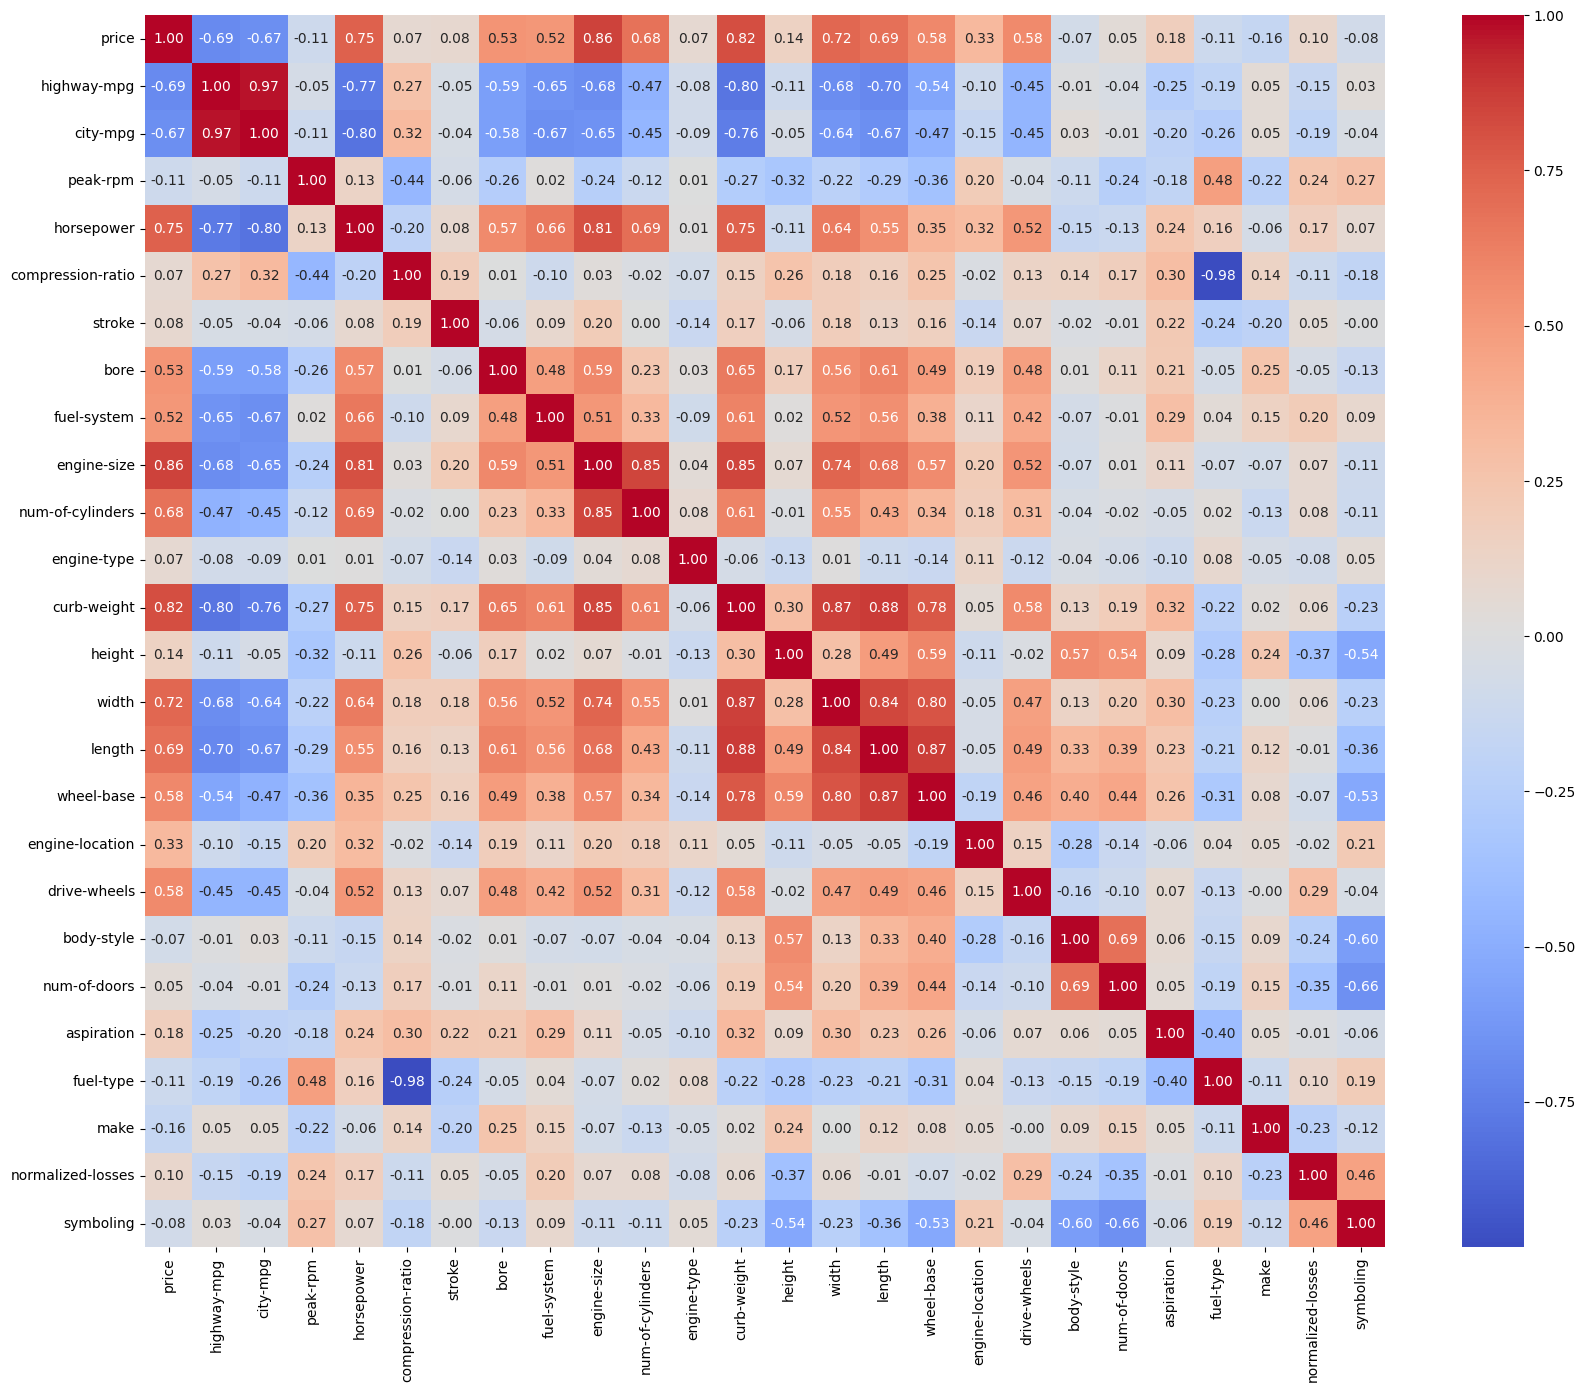

In [13]:
correlation = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')

## Input for Model

### Splitting the Data

In [14]:
X = df.drop(columns=['symboling'])
y = df['symboling']

### Scaling the Data

In [15]:
from sklearn.preprocessing import PowerTransformer

# Using Yeo-Johnson transformation for numerical features 
scaler = PowerTransformer(method='yeo-johnson')

# Apply transformation to numerical features except 'symboling'
numerical = numerical.drop('symboling')
X = scaler.fit_transform(X[numerical])

# Convert the transformed data back to DataFrame
X = pd.DataFrame(X, columns=numerical)

# Tampilkan data setelah transformasi
X.head()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors,normalized-losses
0,0.486177,-0.487338,-0.586744,-0.254047,0.463650,-0.014205,-1.732079,0.527272,0.380332,-0.284007,0.144823,-2.067534,-6.661338e-16,-0.404369,-2.402418,-1.141653,-0.031079
1,0.847588,-0.487338,-0.586744,-0.254047,0.463650,-0.014205,-1.732079,0.527272,0.380332,-0.284007,0.144823,-2.067534,-6.661338e-16,-0.404369,-2.402418,-1.141653,-0.031079
2,0.847588,-0.652500,-0.977418,-0.254047,1.285301,-0.014205,0.667941,-2.451739,0.890484,1.575792,0.647098,-0.533373,-2.775558e-17,-0.205730,-0.699849,-1.141653,-0.031079
3,0.549037,-0.020113,-0.065280,0.789846,0.223899,0.638775,0.417163,-0.508621,-0.294503,-0.284007,-0.303501,0.249497,2.220446e-16,0.233459,0.365001,0.875923,1.323912
4,0.940218,-1.369687,-1.188336,0.789846,0.560477,-1.035191,0.417163,-0.508621,0.535529,0.783207,0.648780,0.249497,3.053113e-16,0.233459,0.296266,0.875923,1.323912


### Splitting Train and Test Data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## XG Boost Regressor

### Base Model

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

def training (model, X_train, y_train):
    # Training the model
    model.fit(X_train, y_train)

    # Predict the value
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse_xgb = mean_squared_error(y_test, y_pred)
    rmse_xgb = np.sqrt(mse_xgb)
    r2_xgb = r2_score(y_test, y_pred)


    print(f"Mean Squared Error (MSE) XGBoost: {mse_xgb}")
    print(f"Root Mean Squared Error (RMSE) XGBoost: {rmse_xgb}")
    print(f"R-squared (R2) XGBoost: {r2_xgb}")

    # Visualize the results
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='tomato')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Regression: Actual vs Predicted')
    plt.grid(True)
    plt.show()

Mean Squared Error (MSE) XGBoost: 0.18962239176877171
Root Mean Squared Error (RMSE) XGBoost: 0.4354565325824975
R-squared (R2) XGBoost: 0.8706350484726846


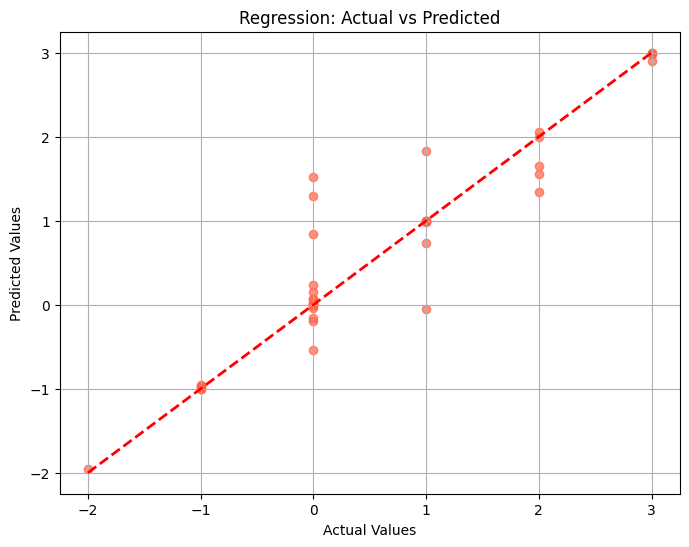

In [18]:
from xgboost import XGBRegressor

model = XGBRegressor(random_state=42, objective='reg:squarederror')
training(model, X_train, y_train)

### Hyperparameter Tuning

In [19]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Perform the grid search
grid_search.fit(X, y)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Best Score: 0.8086772192161492


Model training completed with tuned parameters.
Mean Squared Error (MSE) XGBoost: 0.12728216779132065
Root Mean Squared Error (RMSE) XGBoost: 0.3567662649289036
R-squared (R2) XGBoost: 0.9131650470547037


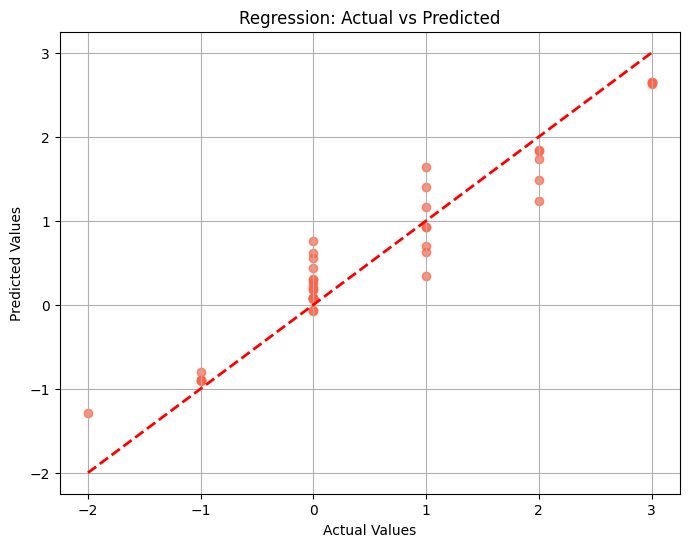

In [20]:
# Extract the best parameters from the grid search
best_params = grid_search.best_params_

# Initialize the XGBoost model with the best parameters
tuned_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    **best_params
)

# Train the model on the training data
print("Model training completed with tuned parameters.")
training(tuned_model, X, y)

## Bagging

Mean Squared Error (MSE): 0.28045853658536585
Root Mean Squared Error (RMSE): 0.5295833613184668
R-squared (R2): 0.808664448051948


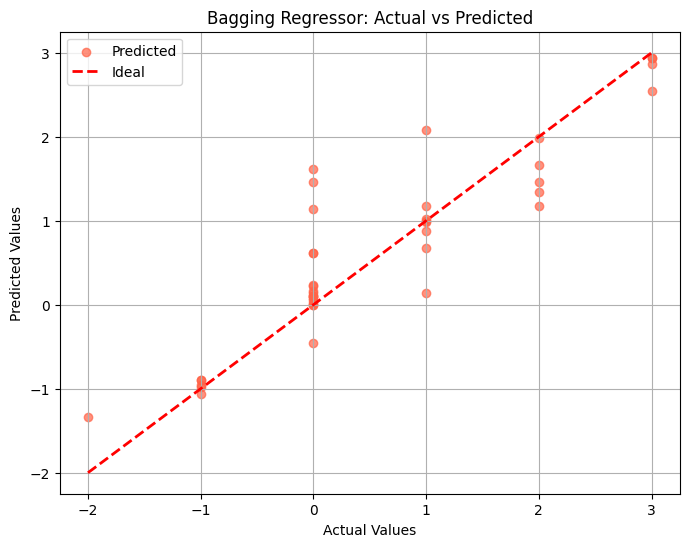

In [21]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialize the base model
base_model = DecisionTreeRegressor(random_state=42)

# Create the Bagging Regressor
bagging_model = BaggingRegressor(
    estimator=base_model,
    n_estimators=50,  # Number of base models
    random_state=42,
    n_jobs=-1
)

def training_bagging (bagging_model, X_train, y_train):
    # Train the Bagging Regressor
    bagging_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred_bagging = bagging_model.predict(X_test)

    # Evaluate the model
    mse_bagging = mean_squared_error(y_test, y_pred_bagging)
    rmse_bagging = np.sqrt(mse_bagging)
    r2_bagging = r2_score(y_test, y_pred_bagging)

    print(f"Mean Squared Error (MSE): {mse_bagging}")
    print(f"Root Mean Squared Error (RMSE): {rmse_bagging}")
    print(f"R-squared (R2): {r2_bagging}")

    # Visualisasi hasil prediksi Bagging Regressor
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_bagging, alpha=0.7, color='tomato', label='Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Ideal')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Bagging Regressor: Actual vs Predicted')
    plt.legend()
    plt.grid(True)
    plt.show()

training_bagging(bagging_model, X_train, y_train)

### Hyperparameter Tuning

In [22]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_bagging = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Initialize the GridSearchCV object
grid_search_bagging = GridSearchCV(
    estimator=BaggingRegressor(estimator=base_model, random_state=42, n_jobs=-1),
    param_grid=param_grid_bagging,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Perform the grid search
grid_search_bagging.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters for Bagging Regressor:", grid_search_bagging.best_params_)
print("Best Score for Bagging Regressor:", -grid_search_bagging.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Bagging Regressor: {'bootstrap': False, 'bootstrap_features': True, 'max_features': 0.7, 'max_samples': 1.0, 'n_estimators': 50}
Best Score for Bagging Regressor: 0.3375226494107744


Mean Squared Error (MSE): 0.19108936314363145
Root Mean Squared Error (RMSE): 0.4371376935744977
R-squared (R2): 0.8696342453553391


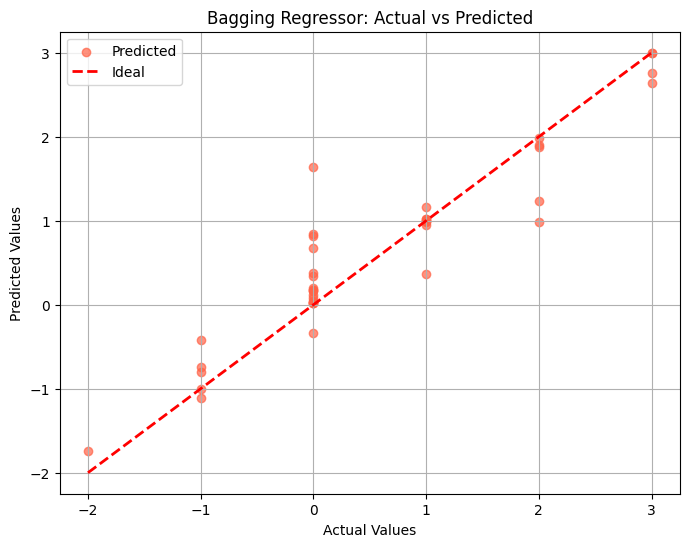

In [23]:
# Extract the best parameters from the grid search for Bagging Regressor
best_params_bagging = grid_search_bagging.best_params_

# Initialize the Bagging Regressor with the best parameters
tuned_bagging_model = BaggingRegressor(
    estimator=base_model,
    n_estimators=best_params_bagging['n_estimators'],
    max_samples=best_params_bagging['max_samples'],
    max_features=best_params_bagging['max_features'],
    bootstrap=best_params_bagging['bootstrap'],
    bootstrap_features=best_params_bagging['bootstrap_features'],
    random_state=42,
    n_jobs=-1
)


# Train the tuned Bagging Regressor
training_bagging(tuned_bagging_model, X_train, y_train)